# Prediction using Decision Tree Algorithm


#### IRIS FLOWER CLASSIFICATION PROJECT - Jonathan Rai

- The main objective of this project is to build and evaluate multiple classification models to predict the species of IRIS flowers based on their sepal length, sepal width, petal length, and petal width.

- Dataset Information
The dataset contains 3 classes of 50 instances each, where each class refers to a type of Iris plant.

- Attribute Information:
Sepal length in cm
Sepal width in cm
Petal length in cm
Petal width in cm
Class: Iris Setosa, Iris Versicolor, Iris Virginica

#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset

In [2]:
iris_df = pd.read_csv("IRIS.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Shape of dataset

In [3]:
iris_df.shape

(150, 5)

- There are 150 rows and 5 columns

#### Info about the dataframe

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Statistical Description of data in a dataframe

In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


#### Unique Species items

In [8]:

iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:

iris_df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

#### Data Preprocessing
- Checking if there's any missing values

In [10]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- There's no any missing values

#### EDA (Exploratory Data Analysis)

- Univariate Analysis

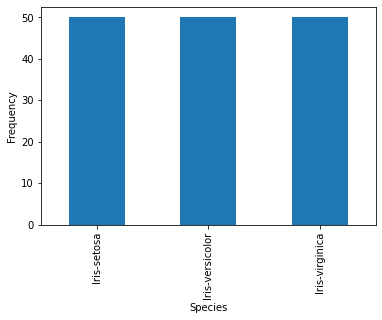

In [11]:
iris_df['species'].value_counts().plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()


<AxesSubplot: ylabel='species'>

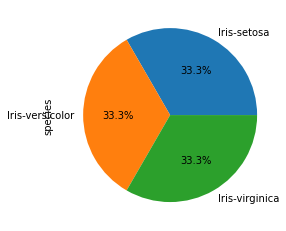

In [12]:
iris_df['species'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot: >

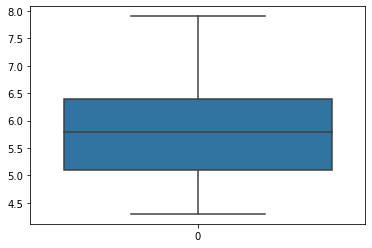

In [14]:
sns.boxplot(iris_df['sepal_length'])

<AxesSubplot: >

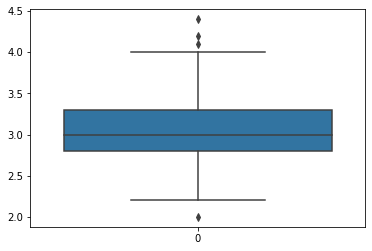

In [15]:
sns.boxplot(iris_df['sepal_width'])

<AxesSubplot: >

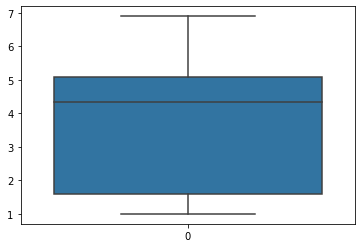

In [16]:
sns.boxplot(iris_df['petal_length'])

<AxesSubplot: >

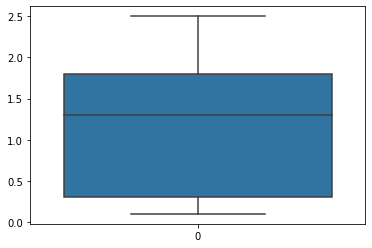

In [17]:
sns.boxplot(iris_df['petal_width'])

#### Multivariate Analysis
- Bivariate Analysis

In [13]:
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


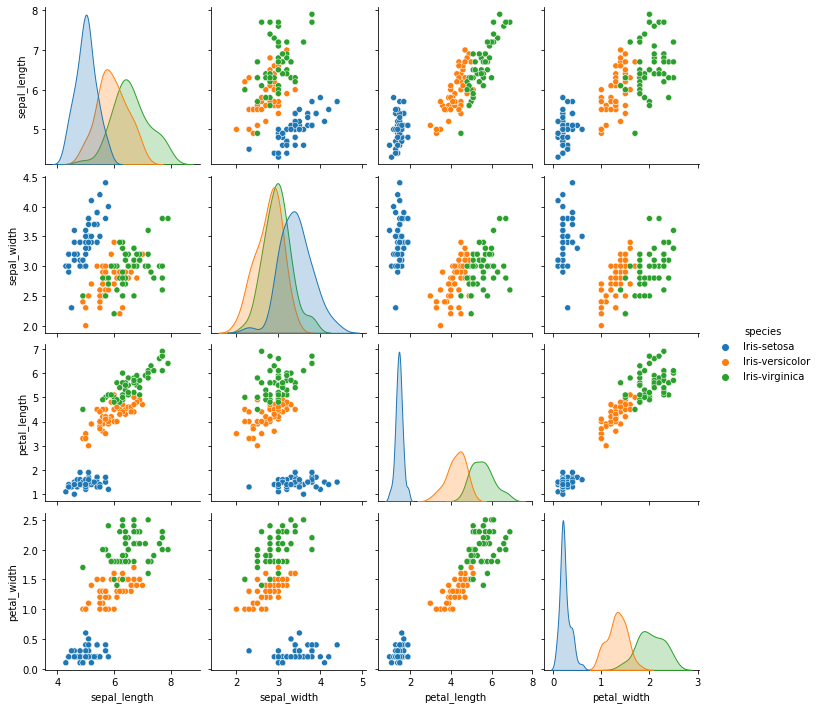

In [22]:
sns.pairplot(iris_df,hue='species')

- We got 4 x 4 = 16 graphs as there are 4 attributes and each of them are plotted against each other

- From the graph we can make conclusion that:
    - Sepal Length of Iris-setosa is more followed by Iris-versicolor and then Iris-virginica
    - Sepal Width of Iris-virginica is more followed by Iris-versicolor and the Iris-setosa
    - Petal Length of Iris-setosa is more followed by Iris-versicolor and then Iris-virginica
    - Petal Width of Iris-setosa is more followed by  Iris-versicolor and then Iris-virginica
    -Iris-setosa is easily differentiable than other two flower

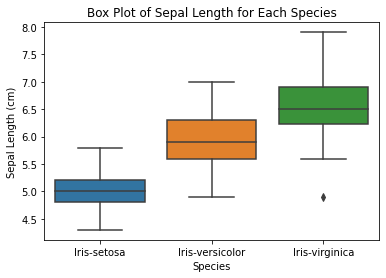

In [18]:
sns.boxplot(x='species', y='sepal_length', data=iris_df)

plt.title('Box Plot of Sepal Length for Each Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

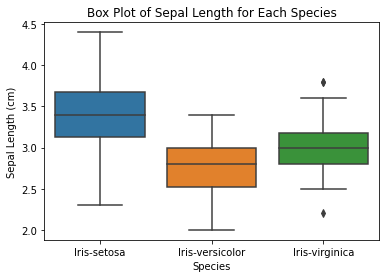

In [19]:
sns.boxplot(x='species', y='sepal_width', data=iris_df)

plt.title('Box Plot of Sepal Length for Each Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

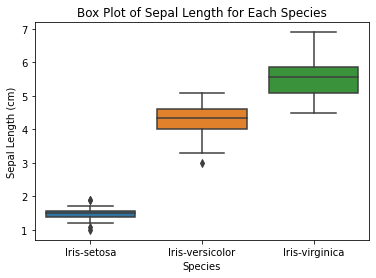

In [20]:
sns.boxplot(x='species', y='petal_length', data=iris_df)

plt.title('Box Plot of Sepal Length for Each Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

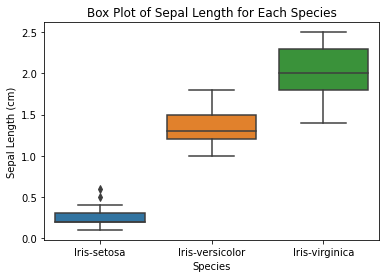

In [21]:
sns.boxplot(x='species', y='petal_width', data=iris_df)

plt.title('Box Plot of Sepal Length for Each Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

#### Relation between features using correlation

In [23]:
iris_df.corr()

<ipython-input-23-1b33314f8075>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-24-036eb1b7edfd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(), annot=True, ax=ax)


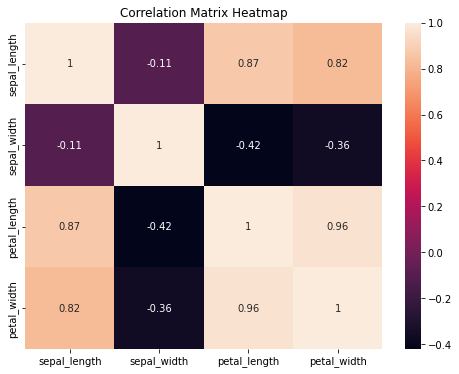

In [24]:
# Create a figure and axis using plt.subplots() with figsize
fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap for the correlation matrix
sns.heatmap(iris_df.corr(), annot=True, ax=ax)

# Show the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

- The color map represent the correlation values, where positive correlations are shown in warmer colors (closer to 1), negative correlations in cooler colors (closer to -1), and no correlation (perfectly uncorrelated) in white color (close to 0).

#### Checking outliers

In [25]:
import plotly.graph_objects as go

In [30]:
# Create the Box Plot using plotly.graph_objects
fig=go.Figure()
fig.add_trace(go.Box(y=iris_df.sepal_length,name='sepal_length'))
fig.add_trace(go.Box(y=iris_df.sepal_width,name='sepal_width'))
fig.add_trace(go.Box(y=iris_df.petal_length,name='petal_length'))
fig.add_trace(go.Box(y=iris_df.petal_width,name='petal_width'))



In [31]:
# Update the layout of the plot (optional)
fig.update_layout(title='Box Plot for Iris Dataset',
                  xaxis=dict(title='Features'),
                  yaxis=dict(title='Measurement in cm'))

# Display the plot
fig.show()

#### Outlier treatment
- As sepalwidth contains outier by using some IQR treatment lets remove it

In [32]:
iris_df['sepal_width'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [34]:
q3 = iris_df["sepal_width"].quantile(0.75)  
q1 = iris_df["sepal_width"].quantile(0.25)
print(q3)
print(q1)

3.3
2.8


In [35]:
IQR = q3 - q1
print(IQR)

0.5


In [36]:
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)

2.05


In [38]:
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)

4.05


In [41]:
iris_df_outliers = np.where(iris_df["sepal_width"] > upper_limit, True,
                np.where(iris_df["sepal_width"] < lower_limit, True, False))

- np.where(df["sepal_width"] > upper_limit, True, np.where(df["sepal_width"] < lower_limit, True, False)) combines the two boolean arrays using np.where. It sets the values to True where either the value is greater than the upper limit or less than the lower limit, indicating outliers.

In [43]:
iris_df_without_outliers = iris_df.loc[~(iris_df_outliers)]

- Now the outlier is removed

<AxesSubplot: ylabel='sepal_width'>

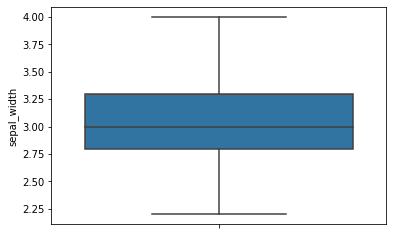

In [45]:

sns.boxplot( y='sepal_width', data=iris_df_without_outliers)


#### Label Encoder

- Converts the labels into numeric form so as to convert it into the machine-readable form

- Label encoding assigns a unique integer to each category in the column. In this case, 'setosa' might be encoded as 0, 'versicolor' as 1, and 'virginica' as 2.

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
# Use Label Encoder to convert 'species' column to numerical form
iris_df['species'] = le.fit_transform(iris_df['species'])

In [48]:
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,0
49,5.0,3.3,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1
12,4.8,3.0,1.4,0.1,0
38,4.4,3.0,1.3,0.2,0


#### Model Training

In [49]:
# Separate features (attributes) and target (class) from the DataFrame
X = iris_df.drop(columns=['species'])
y = iris_df['species']

In [50]:
# Separate the data into train - 80% and test - 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

#### Using Decision Tree Algorithm

In [51]:
from sklearn.tree import DecisionTreeClassifier
# Implement Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
# Make predictions on the test sets
predicted = clf.predict(X_test)

In [53]:
predicted_label = le.inverse_transform(predicted)
print(predicted_label)

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


Evaluate the model

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
# Accuracy
accuracy = accuracy_score(y_test,predicted)
print("Accuracy",accuracy)

Accuracy 0.9333333333333333


In [56]:
# Classification Report
classification_rep = classification_report(y_test,predicted)
print("Classification Report:\n", classification_rep) 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.90      0.90        10
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



- For class 0 ('setosa'), precision, recall, and F1-score are all 1.0, indicating that the model perfectly predicts this class.

- For class 1 ('versicolor'), precision is 0.90, indicating that 90% of the predicted samples of class 1 are correct, recall is 0.90, meaning it correctly identifies 90% of actual 'versicolor' instances, and the F1-score is 0.90.

- For class 2 ('virginica'), precision is 0.86, indicating that 86% of the predicted samples of class 2 are correct, recall is 0.86, indicating that 86 of the actual samples of class 2 are correctly identified and the F1-score is 0.86.

Overall, the model achieved an accuracy of 0.93, which indicates that it correctly predicted 93% of the instances in the test set.

In [57]:
conf_matrix = confusion_matrix(y_test,predicted)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[13  0  0]
 [ 0  9  1]
 [ 0  1  6]]


#### Interpretation:

- Class 0 (setosa):

    - True Positives (TP): 13
    - False Positives (FP): 0
    - False Negatives (FN): 0
    - True Negatives (TN): Not shown in the matrix since it is not applicable for this class (it considers only binary classification).

- Class 1 (versicolor):

    - True Positives (TP): 9
    - False Positives (FP): 0
    - False Negatives (FN): 1
    - True Negatives (TN): Not shown in the matrix since it is not applicable for this class.

- Class 2 (virginica):

    - True Positives (TP): 6
    - False Positives (FP): 0
    - False Negatives (FN): 1
    - True Negatives (TN): Not shown in the matrix since it is not applicable for this class.

- Explanation:

    - Class 0 (setosa) is perfectly predicted with no false positives or false negatives. All 13 samples of class 0 are correctly classified as class 0.

    - Class 1 (versicolor) has 9 true positive predictions, meaning 9 out of 10 samples of class 1 are correctly predicted. There is 1 false negative, indicating that 1 sample of class 1 is misclassified as another class.

    - Class 2 (virginica) has 6 true positive predictions, meaning 6 out of 7 samples of class 2 are correctly predicted. There is 1 false negative, indicating that 1 sample of class 2 is misclassified as another class.

- The confusion matrix provides a more detailed view of the model's performance on each class, helping to identify specific misclassifications and understand how well the model distinguishes between different classes. In this case, the model performs very well overall, with only a few misclassifications in classes 1 and 2.

#### Sample new data to make predictions

In [58]:
# Creating a dictionary 'new_sample' containing feature valuues for the new sample.
new_sample = {'sepal_length':5.1, 'sepal_width':3.5, 'petal_length': 1.4, 'petal_width': 0.2}

In [59]:
# Create a DataFrame from the new sample
new_data = pd.DataFrame([new_sample])

In [60]:
# Make prediction for the new sample
predicted = clf.predict(new_data)

In [61]:
print(predicted)

[0]


In [62]:
# Convert the numerical prediction back to its original label
predicted_label = le.inverse_transform(predicted)
print("Predicted Species for the New Sample:", predicted_label)
print("Predicted Species for the New Sample:", predicted_label[0])

Predicted Species for the New Sample: ['Iris-setosa']
Predicted Species for the New Sample: Iris-setosa


#### Alternatively, if you have multiple new data points as a DataFrame

- Sample new data (replace the values with your own data)
sample_new_data_df = pd.DataFrame({
    'sepal length (cm)': [5.1, 6.2, 4.8],
    'sepal width (cm)': [3.5, 3.1, 3.0],
    'petal length (cm)': [1.4, 4.8, 1.4],
    'petal width (cm)': [0.2, 1.8, 0.3]
})

- Make predictions using the trained classifier
predicted_classes = clf.predict(sample_new_data_df)

print("Predicted classes:", predicted_classes)

#### Let's visualize the decision tree

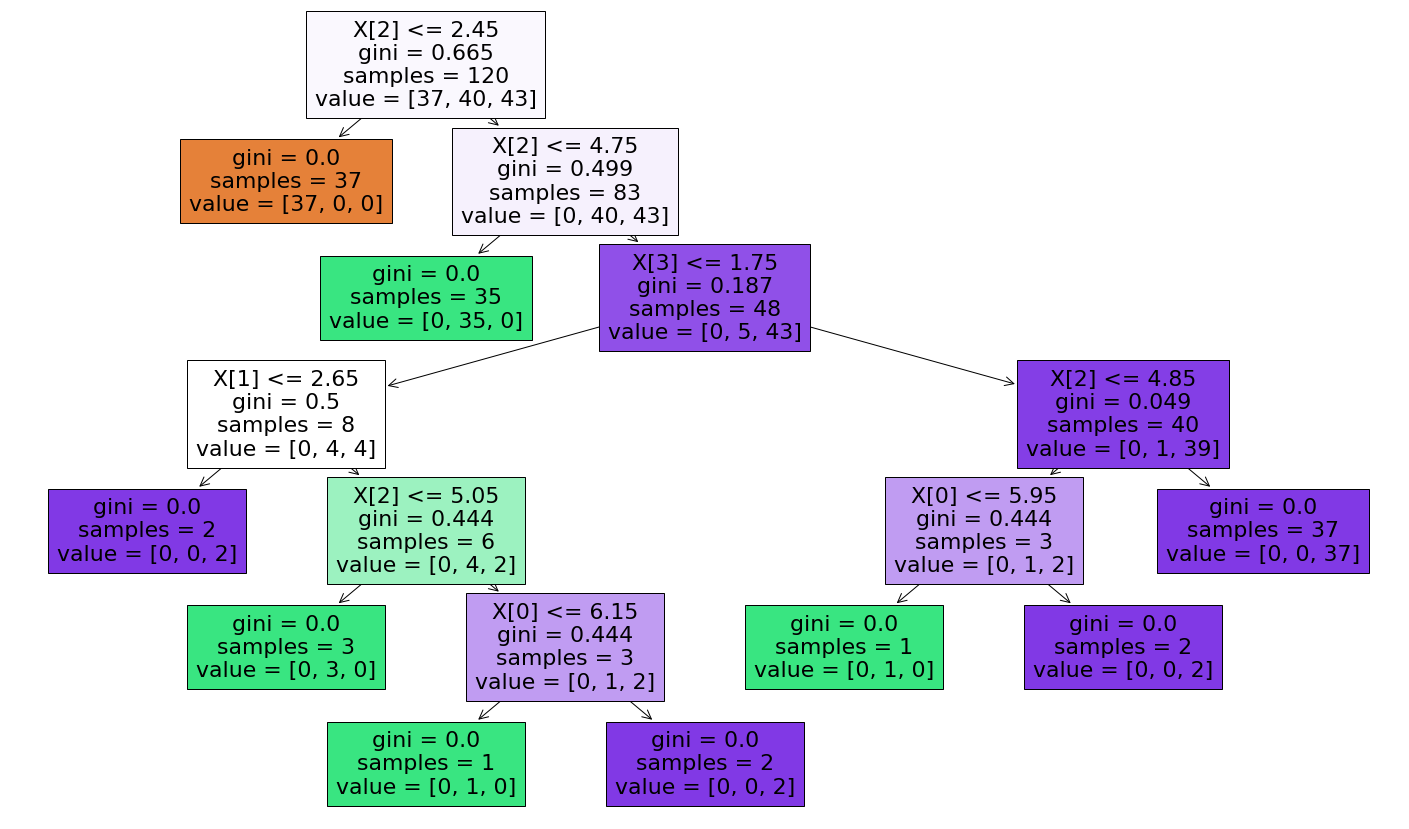

In [63]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(clf,filled=True)

plt.show()

- The above code will visualize the Decision Tree model created by the clf.fit(X_train, y_train) line. The filled=True argument fills the tree nodes with colors to represent different classes. The plt.show() function displays the tree plot.

In [64]:
fig.savefig("Decistion_tree_classifier.png")